In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows: 
 
Data Set Information: 
 
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 
 
 
 
 
Attribute Information: 
 
Listing of attributes: >50K, <=50K. 
 
age: continuous. 
 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
 
fnlwgt: continuous. 
 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  education-num: continuous. 
 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
 
occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
 
         relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,     Unmarried. 
 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
 
sex: Female, Male. 
 
capital-gain: continuous. 
 
capital-loss: continuous. 
 
hours-per-week: continuous. 
 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 
 
Following is the code to load required libraries and data: 
 
import numpy as np 
 
import pandas as pd 
 
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-databases/adult/adult.dat a', header = None) 

 
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.test' , skiprows = 1, header = None) 
 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
 
train_set.columns = col_labels 
 
test_set.columns = col_labels 
 
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                        header = None, skipinitialspace=True)

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,
                       skiprows = 1, delimiter=',', skipinitialspace=True, header = None)

In [4]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 

In [7]:
train_set.columns=col_labels
test_set.columns=col_labels

<AxesSubplot:>

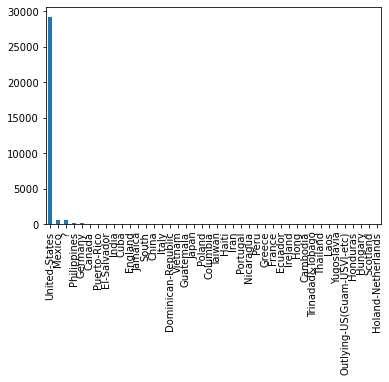

In [8]:
train_set.native_country.value_counts().plot.bar()

<AxesSubplot:>

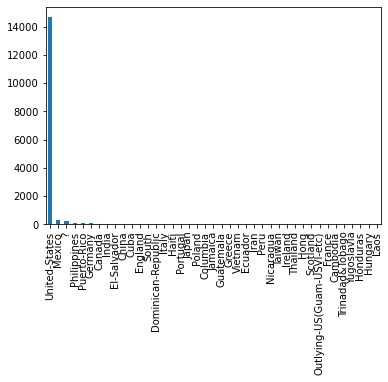

In [9]:
test_set.native_country.value_counts().plot.bar()

to remove biasness its better to drop Column 'native_country' 

In [10]:
train_set=train_set.drop('native_country', axis=1)
test_set=test_set.drop('native_country', axis=1)


In [11]:
train_set.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='workclass', ylabel='count'>

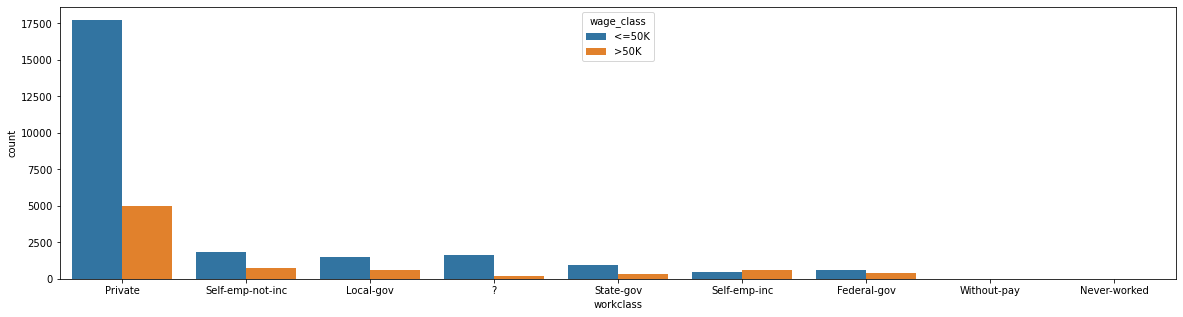

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x='workclass', hue='wage_class', data=train_set, order=train_set.workclass.value_counts().keys())

In [14]:
train_set['workclass']=train_set['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'gov')
train_set['workclass']=train_set['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self')
train_set['workclass']=train_set['workclass'].replace('?', 'Unknown')

<AxesSubplot:xlabel='workclass', ylabel='count'>

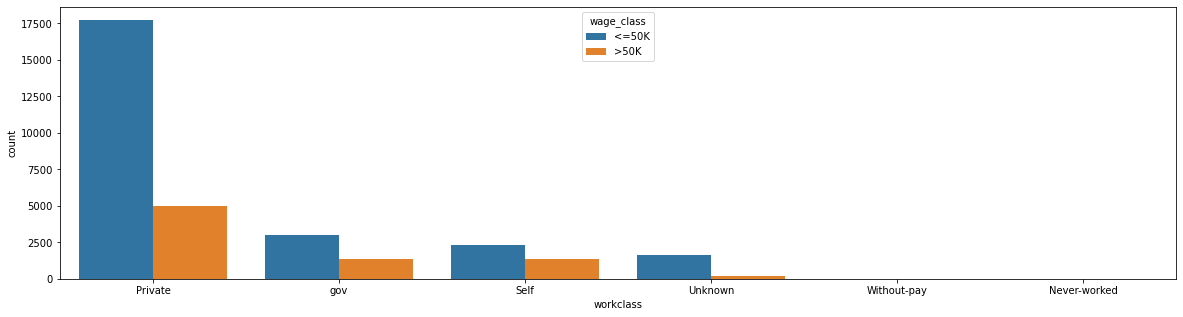

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='workclass', hue='wage_class', data=train_set, order=train_set.workclass.value_counts().keys())

In [16]:
train_set['workclass']=train_set['workclass'].replace({'Private' : 0, 'gov':1, 'Self': 2, 'Unknown':3, 'Without-pay':4, 'Never-worked':5})
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,1,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,2,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,0,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,0,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,0,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


<AxesSubplot:xlabel='workclass', ylabel='count'>

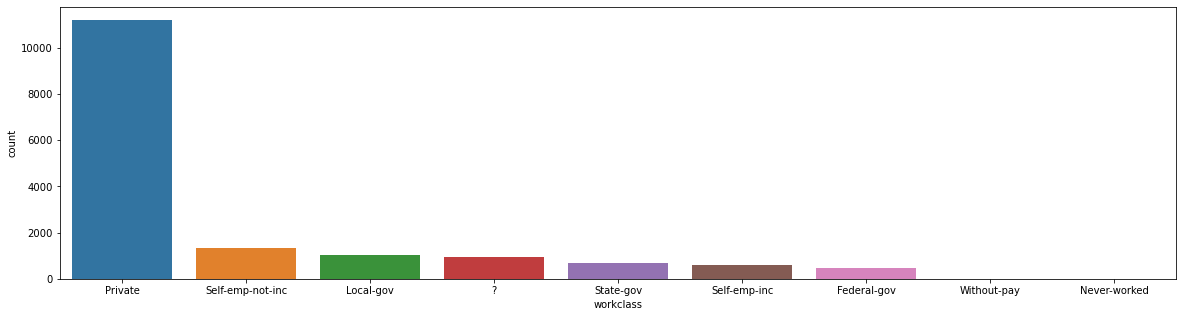

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='workclass', data=test_set, order=test_set.workclass.value_counts().keys())

In [18]:
test_set['workclass']=test_set['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'gov')
test_set['workclass']=test_set['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self')
test_set['workclass']=test_set['workclass'].replace('?', 'Unknown')

In [19]:
test_set.workclass.value_counts()

Private         11210
gov              2198
Self             1900
Unknown           963
Without-pay         7
Never-worked        3
Name: workclass, dtype: int64

In [20]:
test_set['workclass'] = test_set['workclass'].replace({"Private":0, "gov":1, "Self":2, "Unknown":3, "Without-pay":4, "Never-worked":5})
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,25,0,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K.
1,38,0,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K.
2,28,1,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K.
3,44,0,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K.
4,18,3,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,<=50K.


In [21]:
train_set.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [22]:
train_set.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

Column "education" and "education_num" are same, so drop column "education"

In [23]:
train_set=train_set.drop('education', axis=1)
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,1,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,2,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,0,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,0,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,0,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [24]:
test_set.education.value_counts()

HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: education, dtype: int64

In [25]:
test_set.education_num.value_counts()

9     5283
10    3587
13    2670
14     934
11     679
7      637
12     534
6      456
4      309
15     258
5      242
8      224
16     181
3      176
2       79
1       32
Name: education_num, dtype: int64

In [26]:
test_set=test_set.drop("education", axis=1)


In [27]:
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,25,0,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K.
1,38,0,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K.
2,28,1,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K.
3,44,0,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K.
4,18,3,103497,10,Never-married,?,Own-child,White,Female,0,0,30,<=50K.


In [28]:
train_set.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
test_set.occupation.value_counts()

Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical         1841
Other-service        1628
Machine-op-inspct    1020
?                     966
Transport-moving      758
Handlers-cleaners     702
Tech-support          518
Farming-fishing       496
Protective-serv       334
Priv-house-serv        93
Armed-Forces            6
Name: occupation, dtype: int64

Column "Occupation" will be conevrted to numerical values using One Hot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
occ=train_set["occupation"].unique()

In [32]:
enc=OneHotEncoder(handle_unknown='ignore')
enc=enc.fit_transform(train_set["occupation"].values.reshape(-1,1)).toarray()

enc_df=pd.DataFrame(enc.astype(int), columns=occ)

train_set=pd.concat([train_set, enc_df], axis=1)
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,Sales,Craft-repair,Transport-moving,Farming-fishing,Machine-op-inspct,Tech-support,?,Protective-serv,Armed-Forces,Priv-house-serv
0,39,1,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,0,0,0,0,0,0,0
1,50,2,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
train_set=train_set.drop("occupation", axis=1)
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,...,Sales,Craft-repair,Transport-moving,Farming-fishing,Machine-op-inspct,Tech-support,?,Protective-serv,Armed-Forces,Priv-house-serv
0,39,1,77516,13,Never-married,Not-in-family,White,Male,2174,0,...,0,0,0,0,0,0,0,0,0,0
1,50,2,83311,13,Married-civ-spouse,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,215646,9,Divorced,Not-in-family,White,Male,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
occ_test=test_set['occupation'].unique()

In [35]:
enc_test=OneHotEncoder(handle_unknown='ignore')
enc_test=enc_test.fit_transform(test_set['occupation'].values.reshape(-1,1)).toarray()


In [36]:
enc_test_df=pd.DataFrame(enc_test.astype(int), columns=occ_test)
test_set=pd.concat([test_set, enc_test_df], axis=1)
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,Prof-specialty,Craft-repair,Adm-clerical,Exec-managerial,Tech-support,Sales,Priv-house-serv,Transport-moving,Handlers-cleaners,Armed-Forces
0,25,0,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,0,0,1,0,0,0,0,0,0,0
1,38,0,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,28,1,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
3,44,0,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,0,0,1,0,0,0,0,0,0,0
4,18,3,103497,10,Never-married,?,Own-child,White,Female,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_set=test_set.drop("occupation", axis=1)

In [38]:
train_set.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [39]:
train_set.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

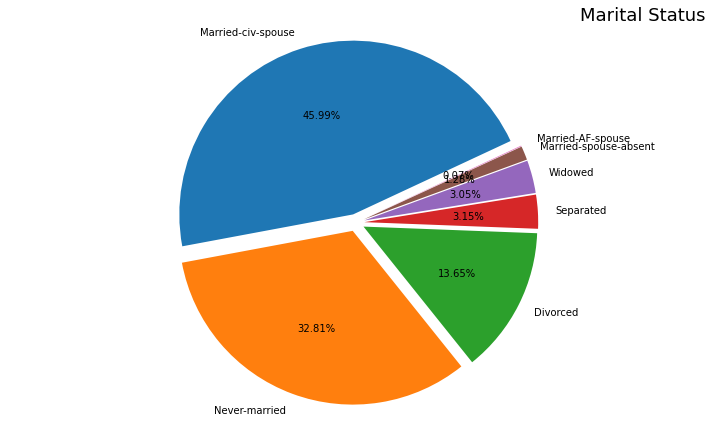

In [40]:
labels=list(train_set["marital_status"].value_counts().keys())
sizes=train_set["marital_status"].value_counts()
explode=[]
for i in labels:
    explode.append(0.05)
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Marital Status", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()

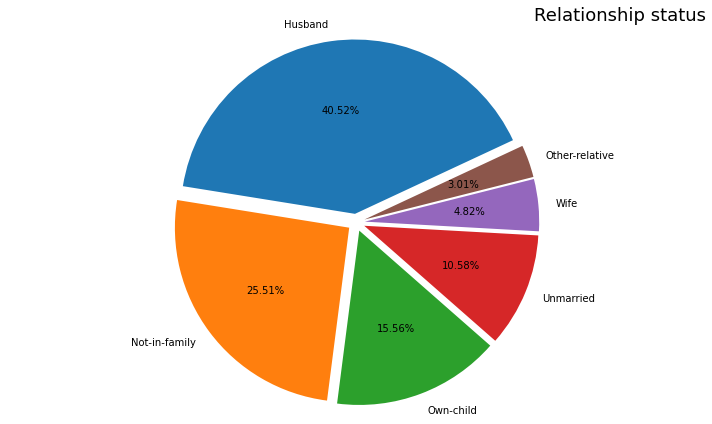

In [41]:
labels=list(train_set["relationship"].value_counts().keys())
sizes=train_set["relationship"].value_counts()
explode=[]
for i in labels:
    explode.append(0.05)
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Relationship status", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()

Relationship status and Marital Status is almost same, so i will drop Relationship column and convert Marital Status to numerical values using One Hot encoding

In [42]:
marital_st=train_set["marital_status"].unique()

In [43]:
enc=OneHotEncoder(handle_unknown='ignore')
enc_train=enc.fit_transform(train_set['marital_status'].values.reshape(-1,1)).toarray()

In [44]:
enc_train_df=pd.DataFrame(enc_train.astype(int),columns=marital_st)

In [45]:
train_set=pd.concat([train_set, enc_train_df], axis=1)
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,...,Protective-serv,Armed-Forces,Priv-house-serv,Never-married,Married-civ-spouse,Divorced,Married-spouse-absent,Separated,Married-AF-spouse,Widowed
0,39,1,77516,13,Never-married,Not-in-family,White,Male,2174,0,...,0,0,0,0,0,0,0,1,0,0
1,50,2,83311,13,Married-civ-spouse,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,0,215646,9,Divorced,Not-in-family,White,Male,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,0,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,0,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
train_set=train_set.drop(["marital_status", "relationship"], axis=1)
train_set.head()

,age,workclass,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,...,Protective-serv,Armed-Forces,Priv-house-serv,Never-married,Married-civ-spouse,Divorced,Married-spouse-absent,Separated,Married-AF-spouse,Widowed
0,39,1,77516,13,White,Male,2174,0,40,<=50K,...,0,0,0,0,0,0,0,1,0,0
1,50,2,83311,13,White,Male,0,0,13,<=50K,...,0,0,0,0,0,1,0,0,0,0
2,38,0,215646,9,White,Male,0,0,40,<=50K,...,0,0,0,1,0,0,0,0,0,0
3,53,0,234721,7,Black,Male,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0
4,28,0,338409,13,Black,Female,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0


In [47]:
marital_st=test_set["marital_status"].unique()

In [48]:
enc=OneHotEncoder(handle_unknown='ignore')
enc_test=enc.fit_transform(test_set['marital_status'].values.reshape(-1,1)).toarray()

In [49]:
enc_test_df=pd.DataFrame(enc_test.astype(int),columns=marital_st)

In [50]:
test_set=pd.concat([test_set, enc_test_df], axis=1)
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,...,Transport-moving,Handlers-cleaners,Armed-Forces,Never-married,Married-civ-spouse,Widowed,Divorced,Separated,Married-spouse-absent,Married-AF-spouse
0,25,0,226802,7,Never-married,Own-child,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,89814,9,Married-civ-spouse,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,1,336951,12,Married-civ-spouse,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,0,160323,10,Married-civ-spouse,Husband,Black,Male,7688,0,...,0,0,0,0,0,1,0,0,0,0
4,18,3,103497,10,Never-married,Own-child,White,Female,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
test_set=test_set.drop(['marital_status', 'relationship'], axis=1)


<AxesSubplot:>

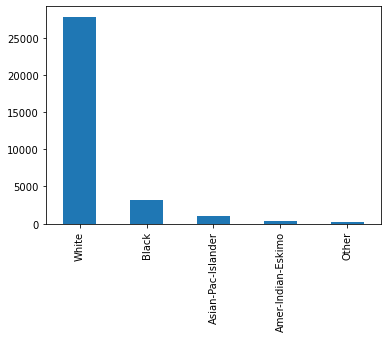

In [52]:
train_set.race.value_counts().plot.bar()

In [53]:
train_set["race"] = train_set["race"].replace({"White":0, "Black": 1, "Asian-Pac-Islander":2, "Amer-Indian-Eskimo":3, "Other":4})
train_set.head()

,age,workclass,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,...,Protective-serv,Armed-Forces,Priv-house-serv,Never-married,Married-civ-spouse,Divorced,Married-spouse-absent,Separated,Married-AF-spouse,Widowed
0,39,1,77516,13,0,Male,2174,0,40,<=50K,...,0,0,0,0,0,0,0,1,0,0
1,50,2,83311,13,0,Male,0,0,13,<=50K,...,0,0,0,0,0,1,0,0,0,0
2,38,0,215646,9,0,Male,0,0,40,<=50K,...,0,0,0,1,0,0,0,0,0,0
3,53,0,234721,7,1,Male,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0
4,28,0,338409,13,1,Female,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

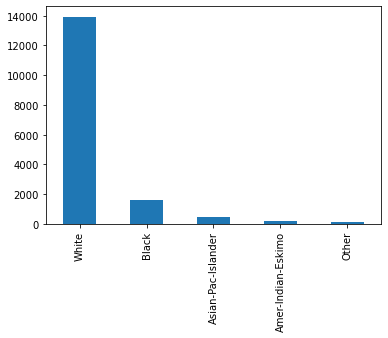

In [54]:
test_set.race.value_counts().plot.bar()

In [55]:
test_set["race"] = test_set["race"].replace({"White":0, "Black": 1, "Asian-Pac-Islander":2, "Amer-Indian-Eskimo":3, "Other":4})
test_set.head()

,age,workclass,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,...,Transport-moving,Handlers-cleaners,Armed-Forces,Never-married,Married-civ-spouse,Widowed,Divorced,Separated,Married-spouse-absent,Married-AF-spouse
0,25,0,226802,7,1,Male,0,0,40,<=50K.,...,0,0,0,0,0,0,0,1,0,0
1,38,0,89814,9,0,Male,0,0,50,<=50K.,...,0,0,0,0,0,1,0,0,0,0
2,28,1,336951,12,0,Male,0,0,40,>50K.,...,0,0,0,0,0,1,0,0,0,0
3,44,0,160323,10,1,Male,7688,0,40,>50K.,...,0,0,0,0,0,1,0,0,0,0
4,18,3,103497,10,0,Female,0,0,30,<=50K.,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

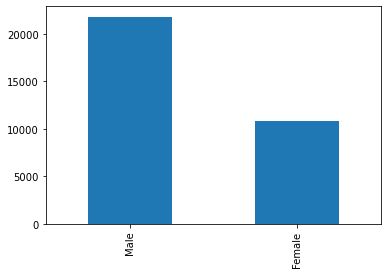

In [56]:
train_set.sex.value_counts().plot.bar()

In [57]:
train_set['sex']=train_set['sex'].replace({"Male":0, "Female":1})
train_set.head()

,age,workclass,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,...,Protective-serv,Armed-Forces,Priv-house-serv,Never-married,Married-civ-spouse,Divorced,Married-spouse-absent,Separated,Married-AF-spouse,Widowed
0,39,1,77516,13,0,0,2174,0,40,<=50K,...,0,0,0,0,0,0,0,1,0,0
1,50,2,83311,13,0,0,0,0,13,<=50K,...,0,0,0,0,0,1,0,0,0,0
2,38,0,215646,9,0,0,0,0,40,<=50K,...,0,0,0,1,0,0,0,0,0,0
3,53,0,234721,7,1,0,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0
4,28,0,338409,13,1,1,0,0,40,<=50K,...,0,0,0,0,0,1,0,0,0,0


In [58]:
test_set['sex']=test_set['sex'].replace({"Male":0, "Female":1})
test_set.head()

,age,workclass,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,...,Transport-moving,Handlers-cleaners,Armed-Forces,Never-married,Married-civ-spouse,Widowed,Divorced,Separated,Married-spouse-absent,Married-AF-spouse
0,25,0,226802,7,1,0,0,0,40,<=50K.,...,0,0,0,0,0,0,0,1,0,0
1,38,0,89814,9,0,0,0,0,50,<=50K.,...,0,0,0,0,0,1,0,0,0,0
2,28,1,336951,12,0,0,0,0,40,>50K.,...,0,0,0,0,0,1,0,0,0,0
3,44,0,160323,10,1,0,7688,0,40,>50K.,...,0,0,0,0,0,1,0,0,0,0
4,18,3,103497,10,0,1,0,0,30,<=50K.,...,0,0,0,0,0,0,0,1,0,0


In [59]:
train_set.wage_class.value_counts()

<=50K    24720
>50K      7841
Name: wage_class, dtype: int64

In [60]:
test_set.wage_class.value_counts()

<=50K.    12435
>50K.      3846
Name: wage_class, dtype: int64

In [61]:
train_set["wage_class"]=train_set["wage_class"].replace({"<=50K":0, ">50K":1})
test_set["wage_class"]=test_set["wage_class"].replace({"<=50K":0, ">50K":1})

In [62]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    32561 non-null  int64
 1   workclass              32561 non-null  int64
 2   fnlwgt                 32561 non-null  int64
 3   education_num          32561 non-null  int64
 4   race                   32561 non-null  int64
 5   sex                    32561 non-null  int64
 6   capital_gain           32561 non-null  int64
 7   capital_loss           32561 non-null  int64
 8   hours_per_week         32561 non-null  int64
 9   wage_class             32561 non-null  int64
 10  Adm-clerical           32561 non-null  int32
 11  Exec-managerial        32561 non-null  int32
 12  Handlers-cleaners      32561 non-null  int32
 13  Prof-specialty         32561 non-null  int32
 14  Other-service          32561 non-null  int32
 15  Sales                  32561 non-nul

In [63]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    16281 non-null  int64 
 1   workclass              16281 non-null  int64 
 2   fnlwgt                 16281 non-null  int64 
 3   education_num          16281 non-null  int64 
 4   race                   16281 non-null  int64 
 5   sex                    16281 non-null  int64 
 6   capital_gain           16281 non-null  int64 
 7   capital_loss           16281 non-null  int64 
 8   hours_per_week         16281 non-null  int64 
 9   wage_class             16281 non-null  object
 10  Machine-op-inspct      16281 non-null  int32 
 11  Farming-fishing        16281 non-null  int32 
 12  Protective-serv        16281 non-null  int32 
 13  ?                      16281 non-null  int32 
 14  Other-service          16281 non-null  int32 
 15  Prof-specialty     

# MODEL BUILD: XGBOOSTClassifier

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X=train_set.drop("wage_class", axis=1)
y=train_set["wage_class"]

In [66]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.3, random_state=50)

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
prediction=xgb.predict(X_test)


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score 

In [71]:
accuracy_score=cross_val_score(xgb, X,y, scoring="accuracy", cv=20)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
print(accuracy_score)

[0.86065071 0.87285012 0.85687961 0.87100737 0.87223587 0.87960688
 0.85810811 0.88329238 0.86609337 0.87162162 0.87039312 0.86793612
 0.87100737 0.86855037 0.88206388 0.87223587 0.87346437 0.87899263
 0.87100737 0.86240786]


In [73]:
print(accuracy_score.mean())

0.8705202502854437


In [74]:
confusion_matrix=confusion_matrix(prediction, y_test)
print(confusion_matrix)

[[6918  819]
 [ 471 1561]]


In [75]:
classification_report=classification_report(prediction, y_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7737
           1       0.66      0.77      0.71      2032

    accuracy                           0.87      9769
   macro avg       0.80      0.83      0.81      9769
weighted avg       0.88      0.87      0.87      9769



# XGBClassifer with Accuracy Score 87%